In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import winsound, os
# plotting 3D complex plane
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import scipy

In [2]:
def fnGenSampledSinusoid(A,Freq,Phi, Fs,sTime,eTime,mode="cos"):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    if mode == "cos":
        y = A*np.cos(2 * np.pi * Freq * n + Phi)
    else:
        y = A*np.sin(2 * np.pi * Freq * n + Phi)
 
    return [n,y]

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))


### Lab 2 Question 1

#### a. State the convolution equation and discuss its application.

### Ans
The convolution equation is a mathematical operation that takes two signals, one being the input signal and the other being a system impulse response, and produces a third signal, the output signal. 

It is defined as: 

$$
y[n] = x[n] * h [n] = \sum_{k=-\infty}^{\infty}x[n]h[n-k]
$$

where x(t) is the input signal, h(t) is the impulse response of the system, y(t) is the output signal, and * denotes the convolution operator.


The application can decompose a signal into a series of scaled and time-shifted impulses, we can deduce the output response by combining the impulse response of each of the impulses

#### b. What happens to a pure sinusoid when it is passes through an LTI system? 
What does
Eigen function of an LTI system mean? Hint – read [7].

Generate 𝑥􁈾𝑛􁈿 􀵌 1 ∗ cos 􁈺0.1𝜋 𝑛􁈻 for 5 cycles of the signal. Convolve this signal

with ℎ􁈾𝑛􁈿 􀵌 􁈼0.2,0.3, 􀵆0.5􁈽, n = 0,1,2. Plot the input and output signal together on

the same graph, and comment on their relationship.

Hint python implementation:
h = np.array([0.2,0.3,-0.5])

The output waveform is also a sinusoid, but its amplitude and phase may be different from the input. The LTI system will change the amplitude, phase and/or frequency of the input signal.


Eigen Function of an LTI System means that the signal passing through the system will experience a change in phase and amplitude. There are no changes in frequency

In [17]:
def Question1b():
    h_n = np.array([0.4,0.2,0.3] + [0 for _ in range(47)] + [0 for _ in range(50)] ,dtype='float')
    n = np.arange(0,100,1)
    x_n = 1*np.cos(0.1*np.pi*n)
    
    print(h_n)
    print(x_n)
    
    
    # for j in range(0,50):
    #     x_n[j] = 0
    y_n = np.convolve(x_n,h_n)
    
    print(y_n)
    plt.figure(1,figsize=(30,20))
    plt.subplot(211)
    plt.stem(n,x_n,use_line_collection=True,basefmt="b",linefmt='y')
    plt.stem(n,h_n,use_line_collection=True,basefmt="b",linefmt='r')
    plt.subplot(212)
    plt.stem(n,y_n[0:100],use_line_collection=True,basefmt="b",linefmt='g')   
    plt.show()

[0.4 0.2 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  6.12323400e-17 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00 -9.51056516e-01
 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01 -1.83697020e-16
  3.09016994e-01  5.87785252e-01  8.09016994e-01  9.51056516e-01
  1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  3.06161700e-16 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00 -9.51056516e-01
 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01 -4.28626380e-16
  3.09016994e

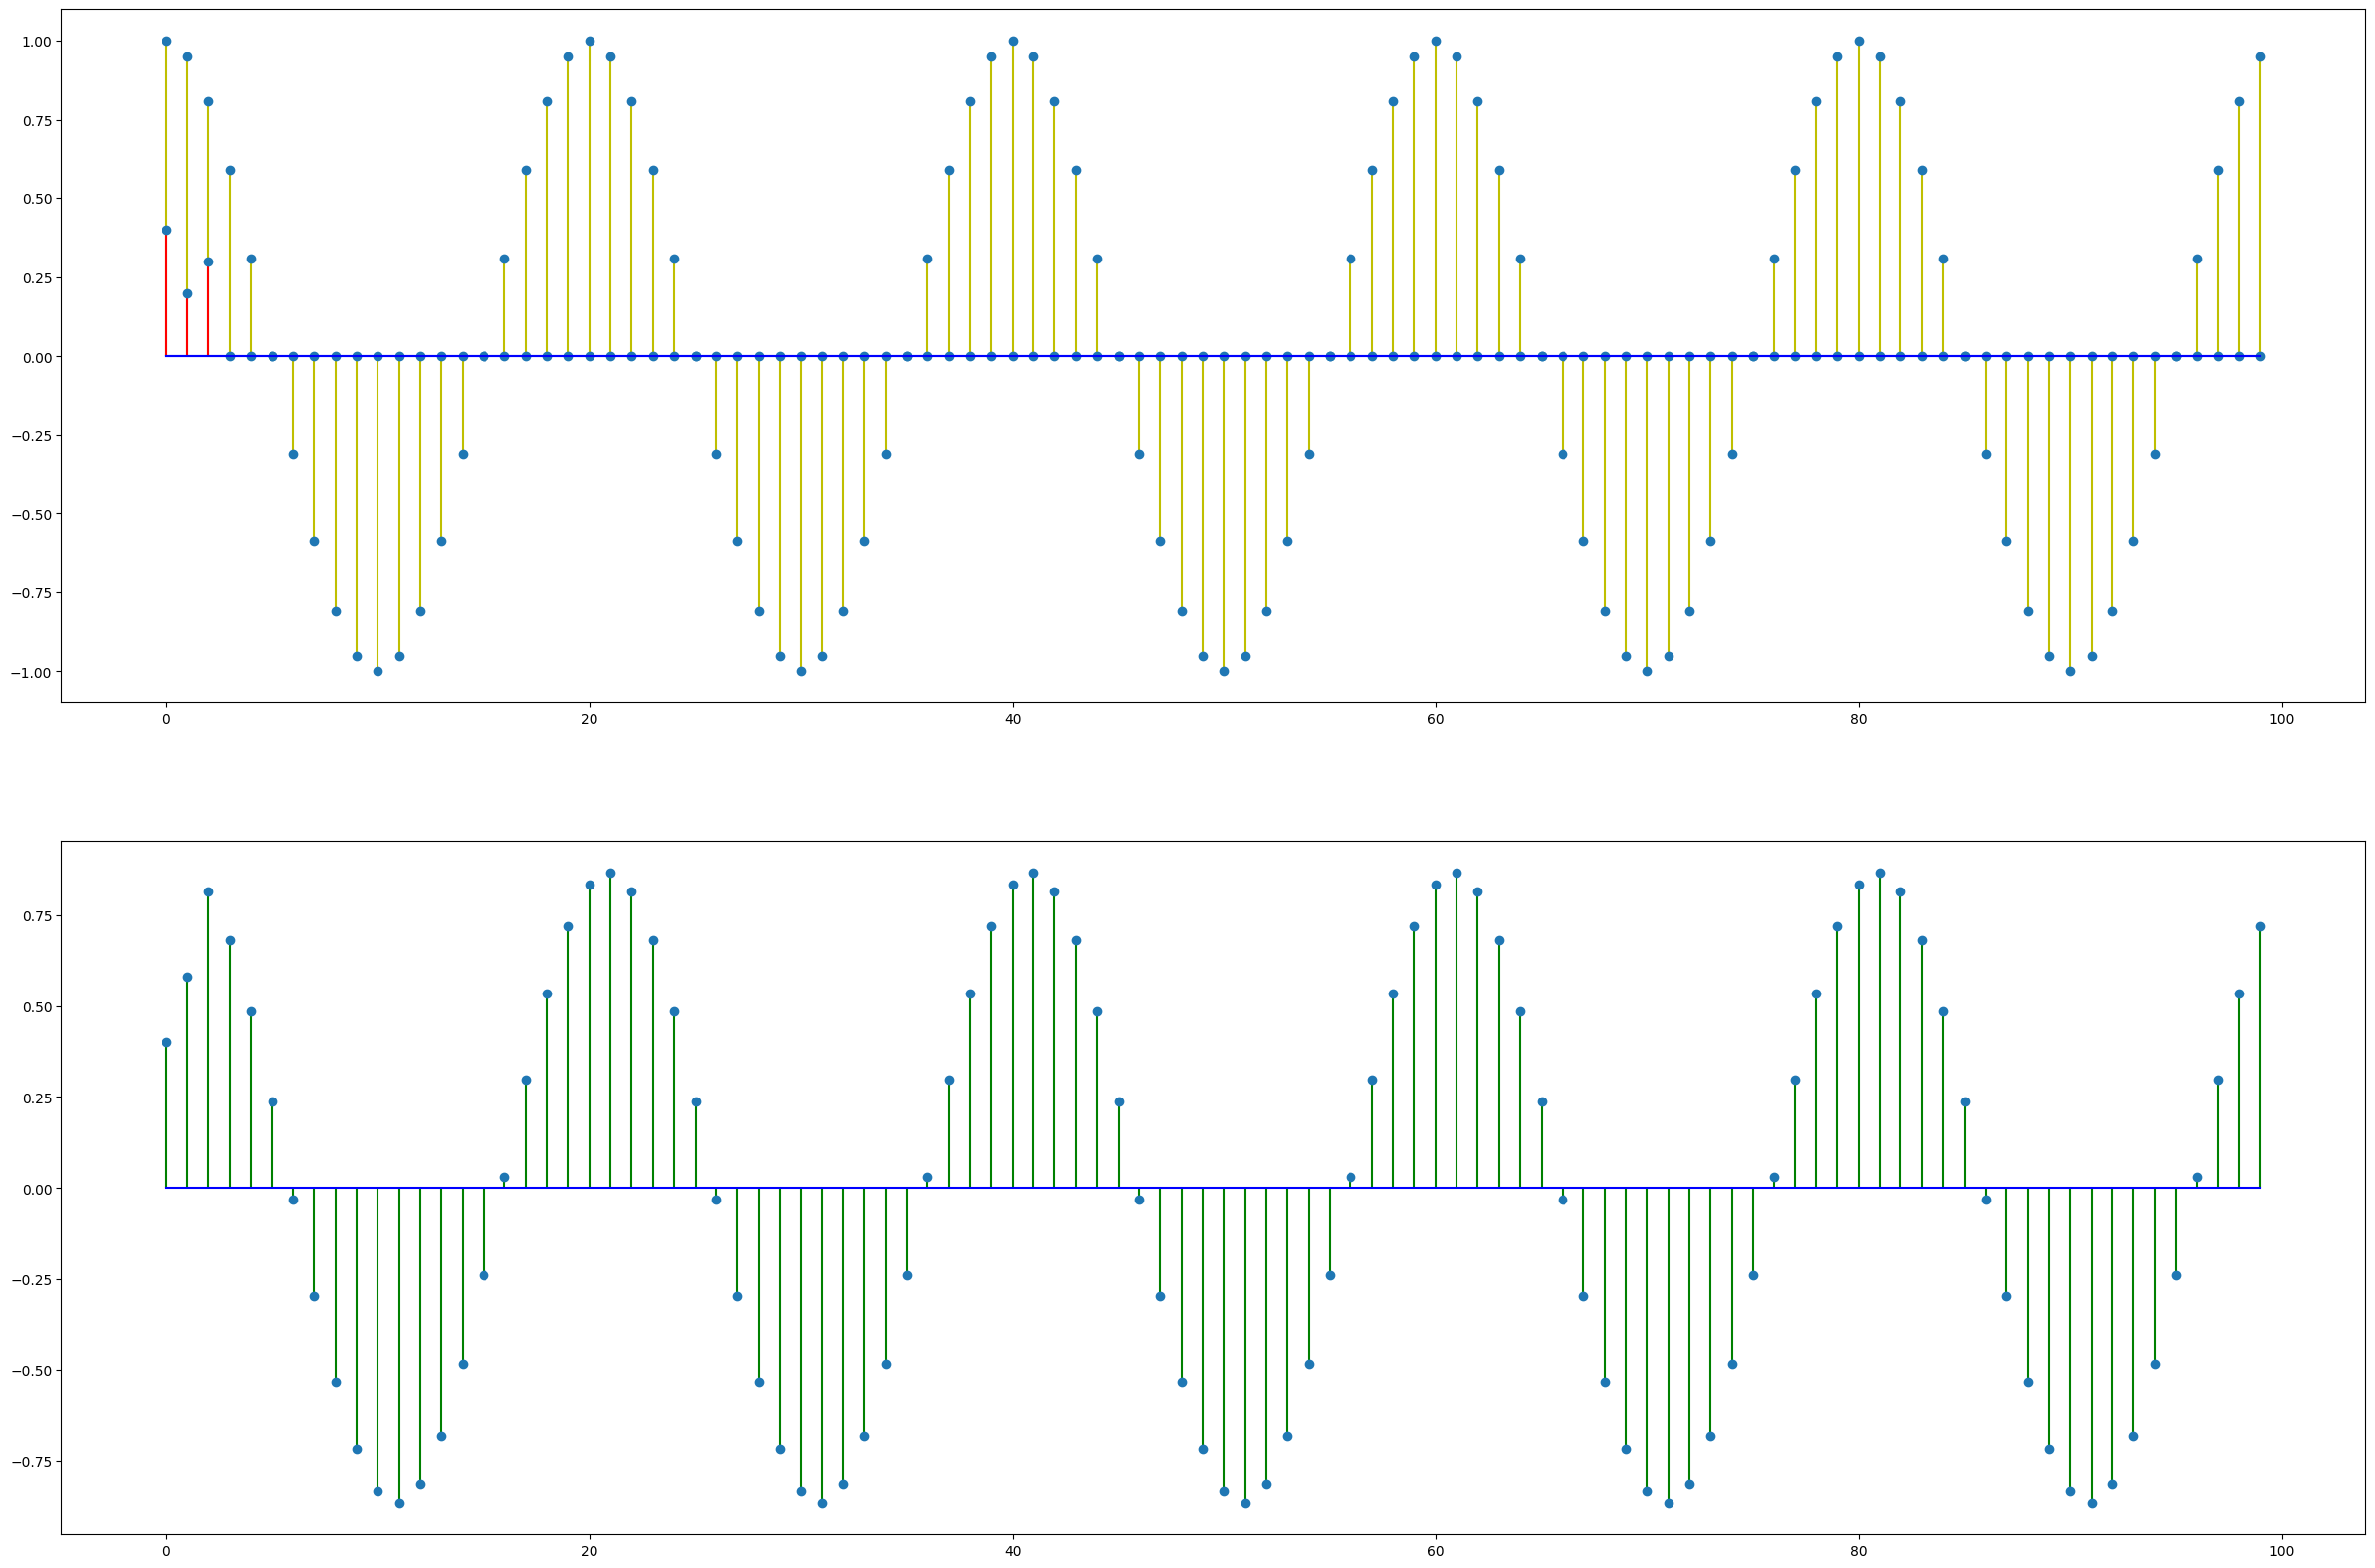

In [18]:
Question1b()

### Lab 2 Question 2

### The convolution equation and the linear constant coefficient difference equation are related in that they both describe the response of an LTI system to an input signal.

### Ans
The convolution equation describes the output signal as the convolution of the input signal with the impulse response of the system, while the linear constant coefficient difference equation describes the output signal as a linear combination of previous values of the input signal and previous values of the output signal.


Finite Impulse Response (FIR) system is an LTI system whose impulse response has a finite duration. The coefficients of the difference equation are determined by the impulse response coefficients. For example, if the impulse response of an FIR system is h[n] = [h0, h1, h2, ..., hN-1], then the difference equation for the output y[n] can be expressed as: y[n] = h0x[n] + h1x[n-1] + h2x[n-2] + ... + hN-1x[n-N+1].

### Lab 2 Question 3

### 3. You are given an input wave file (testIp_16bit.wav) which is a 16KHz-16bit sampled wave

file and an LTI system with impulse response defined by

impulseH = np.zeros(8000)

impulseH[1] = 1

impulseH[4000] = 0.5

impulseH[7900] = 0.3

The above impulse response typifies an echo filter [1]. This is different to room impulse response which is not as sparse, see [2].

### a. Sketch the impulse response. Write your own routine to generate the output y[n] by convolving the input wave file sequence with the given system. You can check the correctness of your implementation by comparing it against numpy’s convolve function[8] output to ensure correctness.

In [19]:
#Play the sound
input_wavfile = "helloWorld_16bit.wav"
winsound.PlaySound(input_wavfile, winsound.SND_FILENAME)

In [20]:
def extract_data_from_wav(wav_filename):
    # Load the WAV file
    [fs, data] = wavfile.read(wav_filename)   
    
    # Return the sample rate and data as a tuple
    return [fs, data]

In [21]:
def plot_wave_and_spectrogram(wav_filename):
    # Load the WAV file
    [fs, data] = extract_data_from_wav(wav_filename) 
    print(len(data))
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(data,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    freqs, times, spectrogram = signal.spectrogram(data, fs)
    plt.subplot(122)
    # Plot the spectrogram
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()

14933


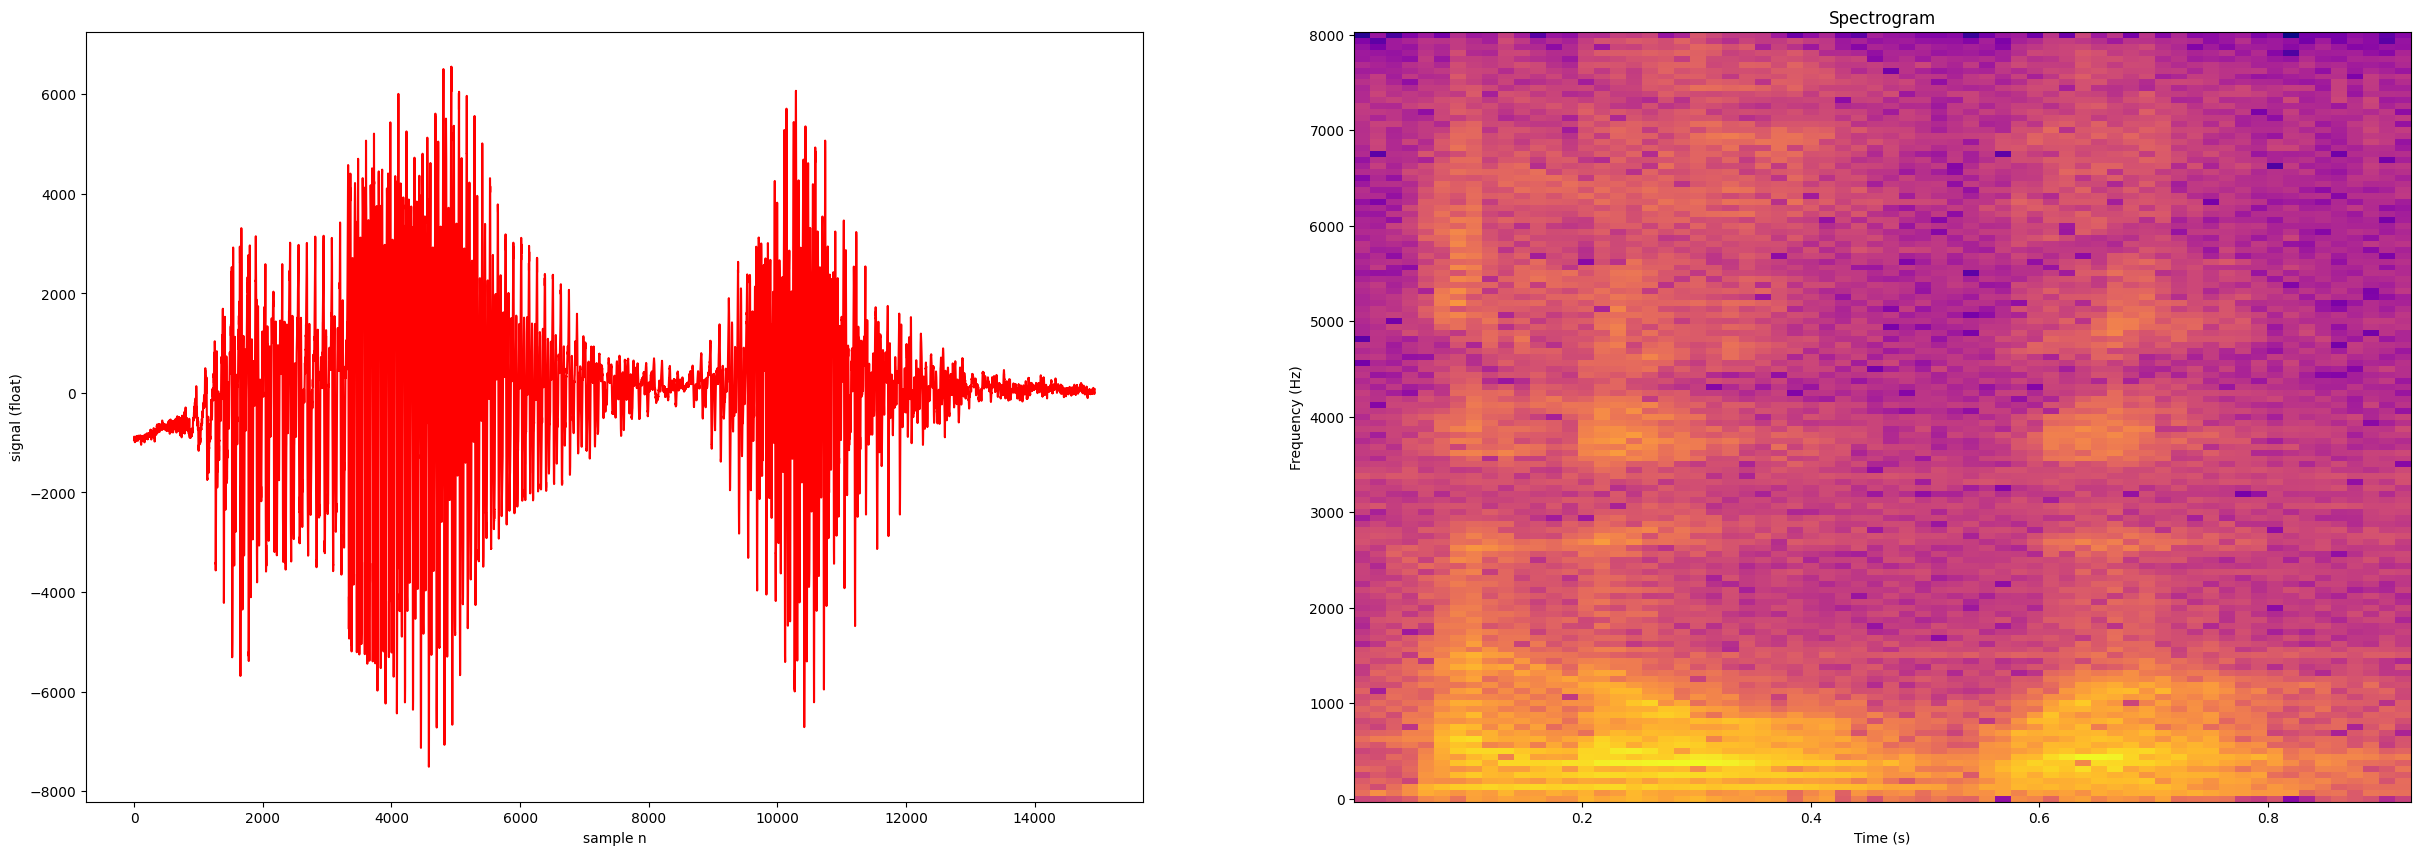

In [22]:
plot_wave_and_spectrogram("helloWorld_16bit.wav")

In [23]:
def custom_Convolution(x,h):
    N = len(x)
    M = len(h)
    y = np.zeros(N+M-1)
    for n in range(N+M-1):
        for k in range(M):
            if n-k >= 0 and n-k < N:
                y[n] += x[n-k] * h[k]
    return np.array(y).astype(int)

In [24]:
test_x = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
test_h = np.array([0,1,2,0,0,3,4,0])
val_y =np.convolve(test_x,test_h)
pred_y=custom_Convolution(test_x,test_h)
print("NP CONVOLVE",val_y,len(val_y))
print("CUSTOM FUNC",pred_y,len(pred_y))

NP CONVOLVE [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0] 33
CUSTOM FUNC [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0] 33


In [61]:
def Q3a():
    [fs, signal_data] = extract_data_from_wav("helloWorld_16bit.wav")
    n = np.arange(0,len(signal_data),1)
    impulseH = np.zeros(len(signal_data))
    
    impulseH[1] = 1
    impulseH[7000] = 0.5
    impulseH[len(signal_data)-100] = 0.3
    
    
    
    plt.figure(figsize=(30,10))
    plt.subplot(411)
    plt.stem(impulseH,use_line_collection=True)
    plt.ylabel('impulse response of the IIR filter')
    plt.xlabel('sample n')  
    plt.subplot(412)
    plt.ylabel('Sound Signal')
    plt.plot(signal_data,'r')
    
    y_n = np.convolve(signal_data,impulseH)
    plt.subplot(413)
    plt.ylabel('impulse response of the IIR filter')
    plt.plot(y_n,'g')
    
    # y_n_2 = custom_Convolution(signal_data,impulseH)
    # plt.subplot(414)
    # plt.ylabel('impulse response of the IIR filter 2')
    # plt.plot(y_n_2,'y')
    plt.show()
    
    return [fs,y_n]

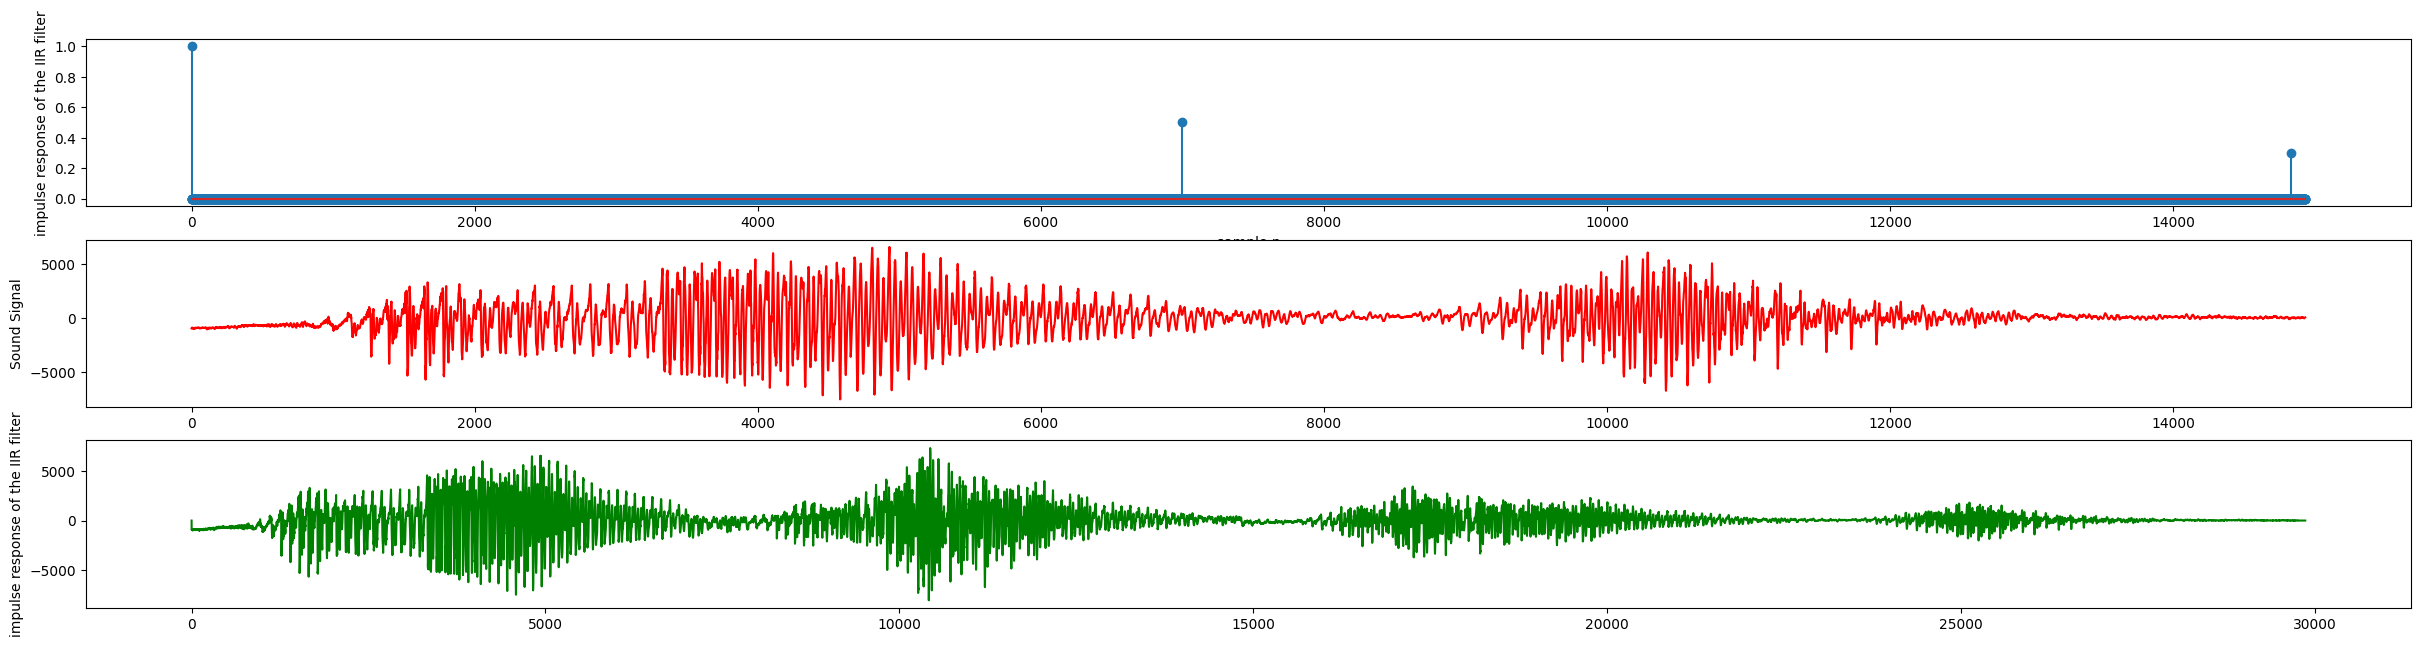

In [62]:
[fs,y_n] = Q3a()

### b. Save y[n] as a wave file (16KHz, 16bits) and listen to it. What did the filter do to the input wave file? Explore the effects of the system on the given input by setting different values to impulseH.

In [120]:
winsound.PlaySound("helloWorld_16bit.wav", winsound.SND_FILENAME)

In [121]:
y_16bit = fnNormalizeFloatTo16Bit(y_n)
wavfile.write("helloWorld_16bit_modified.wav", fs, y_16bit)
winsound.PlaySound("helloWorld_16bit_modified.wav", winsound.SND_FILENAME)

### c. Convolution is an expensive process. Is there a simpler way to generate the output? Hint – since most of impulse values are zero.

One approach to simplify the computation is to use the "overlap-add" method, which involves dividing the input signal into overlapping blocks, filtering each block separately, and then adding the results together. The blocks are chosen such that they overlap by a certain amount, which ensures that the filtered output is continuous.

### 4. Given two discrete time systems (h1 and h2) with finite impulse response given by
h1[n] = [0.06523, 0.14936,0.21529,0.2402,0.21529,0.14936,0.06523]


h2[n] = [-0.06523, -0.14936,-0.21529,0.7598,-0.21529,-0.14936,-0.06523]

In [22]:
h1_n = [0.06523, 0.14936,0.21529,0.2402,0.21529,0.14936,0.06523]

h2_n = [-0.06523, -0.14936,-0.21529,0.7598,-0.21529,-0.14936,-0.06523]

#### a. Plot these two system’s impulse response.

In [23]:
def plotimpulseResponse(impulseH):
    n = np.arange(0,len(impulseH),1)
    
    plt.figure(figsize=(30,10))
    plt.stem(impulseH,use_line_collection=True)
    plt.ylabel('impulse response of the IIR filter')
    plt.xlabel('sample n')  
    

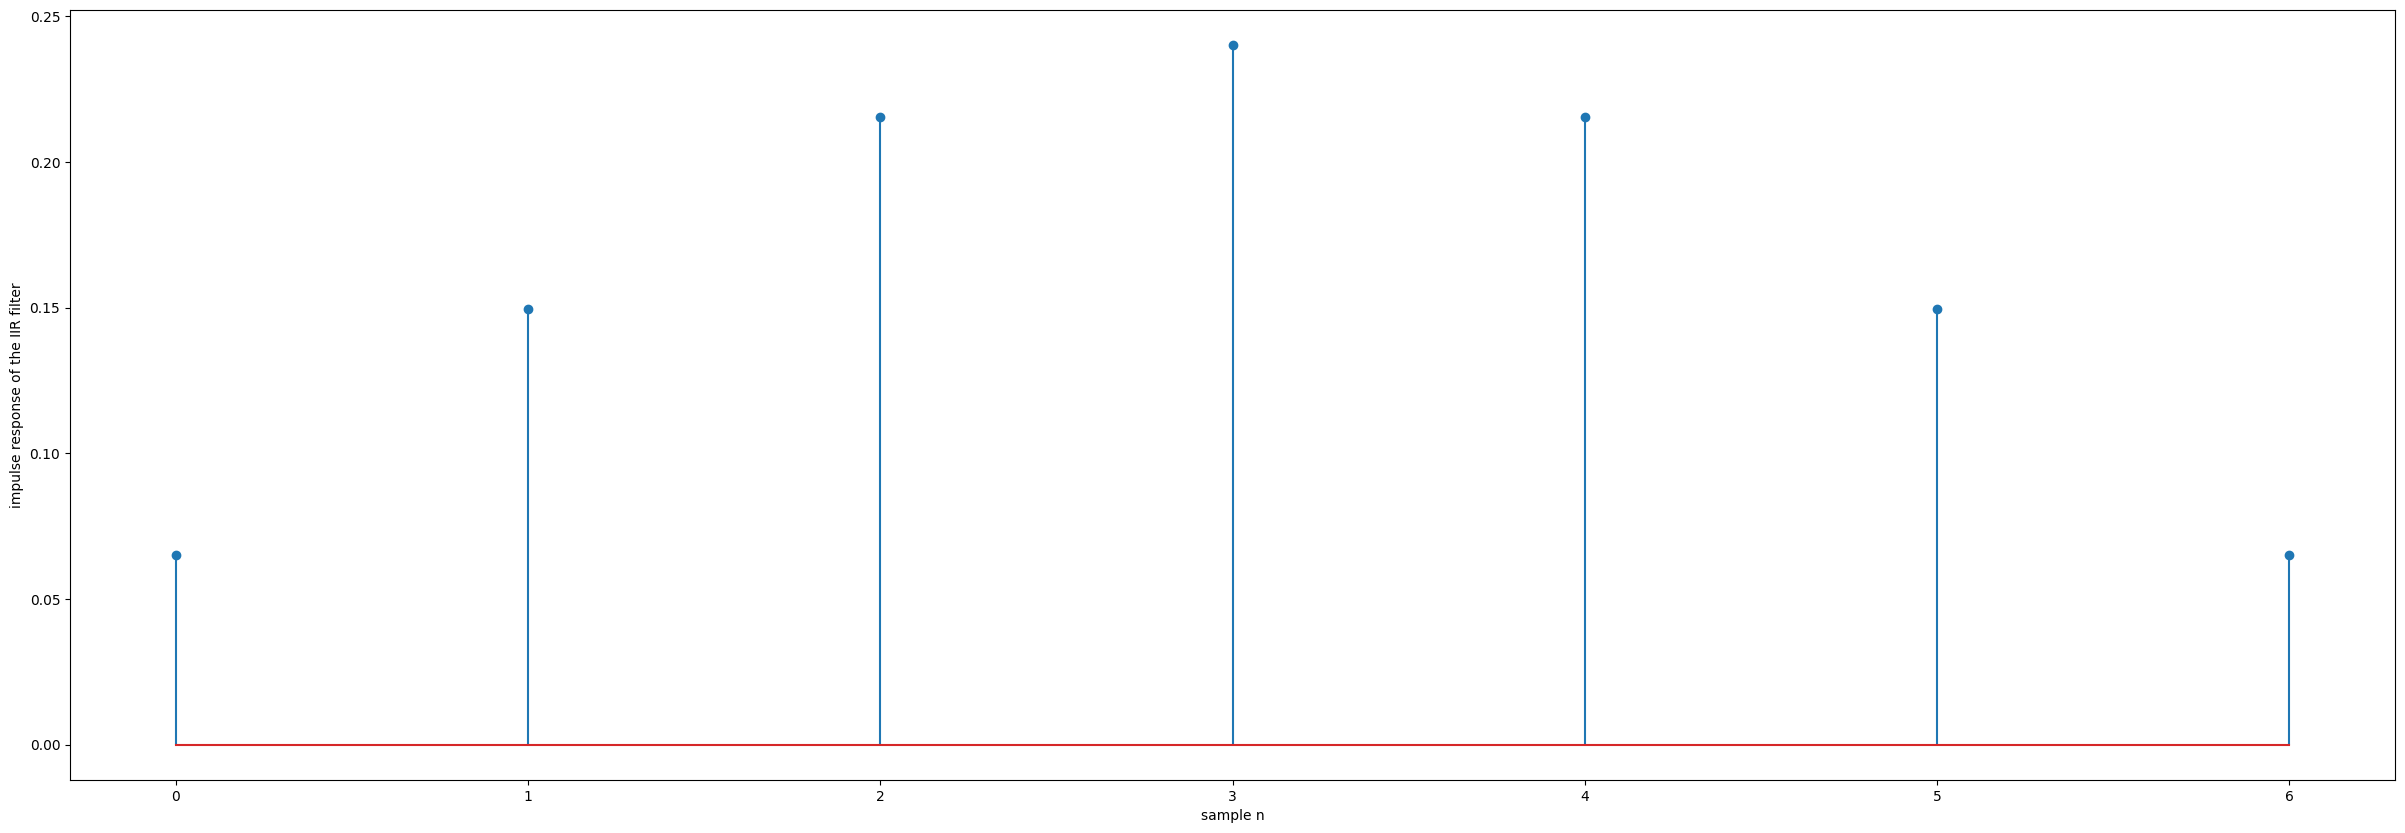

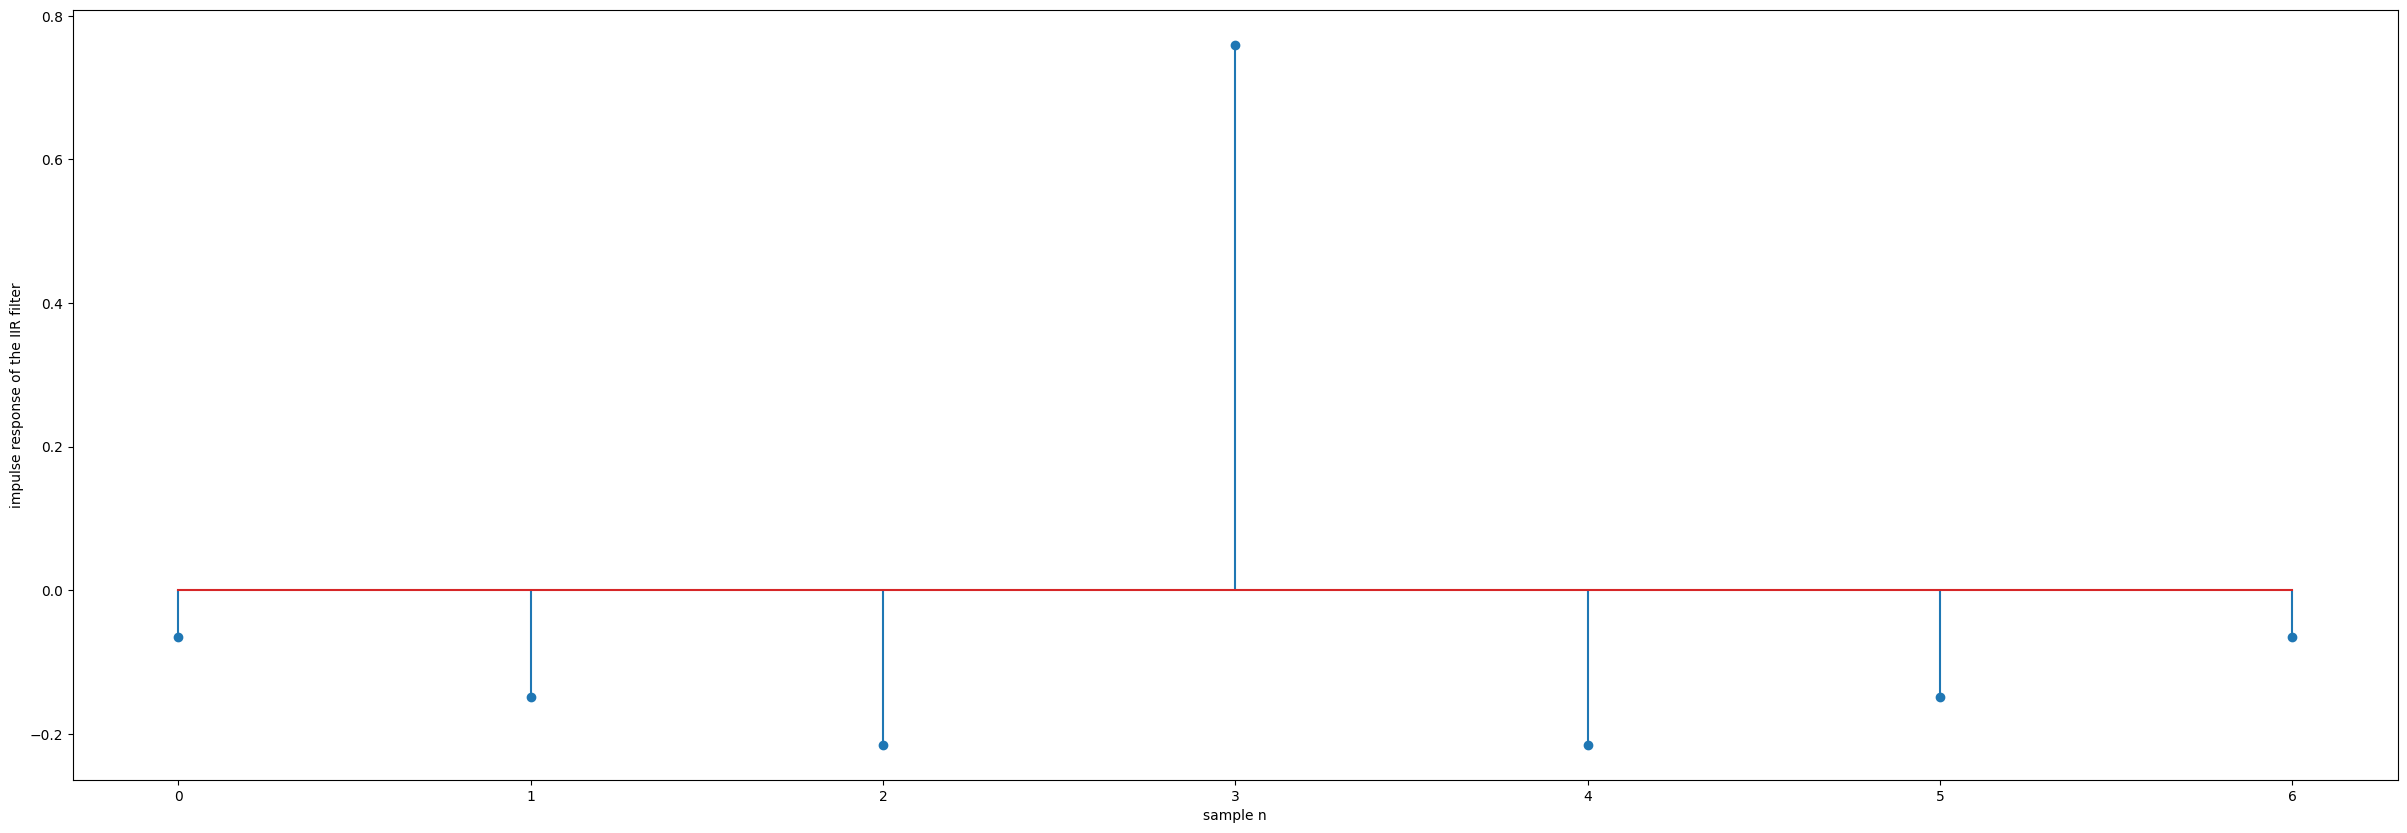

In [24]:
plotimpulseResponse(h1_n)
plotimpulseResponse(h2_n)

#### b. Implement your own code as a module to generate the output for the above system for input 𝑥􁈾𝑛􁈿 􀵌 𝛿􁈾𝑛􁈿 􀵆 2𝛿􁈾𝑛 􀵆 15􁈿. See Lab2Example.py for possible realisation.

Plot the system’s output. A suggested function prototype will be

Y = myFilter_Convolve(H,X)

where H = impulse response of the LTI system, X = impulse sequence of desired length. You can compare your results using SciPy’s lfilter module[6] and numpy convolve function. What is the relationship between the output of the system to the impulse response?

In [25]:
def myFilter_Convolve(H,X):
    y1 = np.convolve(H,X)
    y2 = scipy.signal.lfilter(H,[1],X)
    plt.figure(figsize=(30,10))
    plt.subplot(211)
    plt.stem(y1,  linefmt='r-o')
    plt.subplot(212)
    plt.stem(y2, linefmt='b-x')
    plt.ylabel('op using convolve and scipy lfilter')
    plt.xlabel('sample n')
    plt.show()

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0]
26


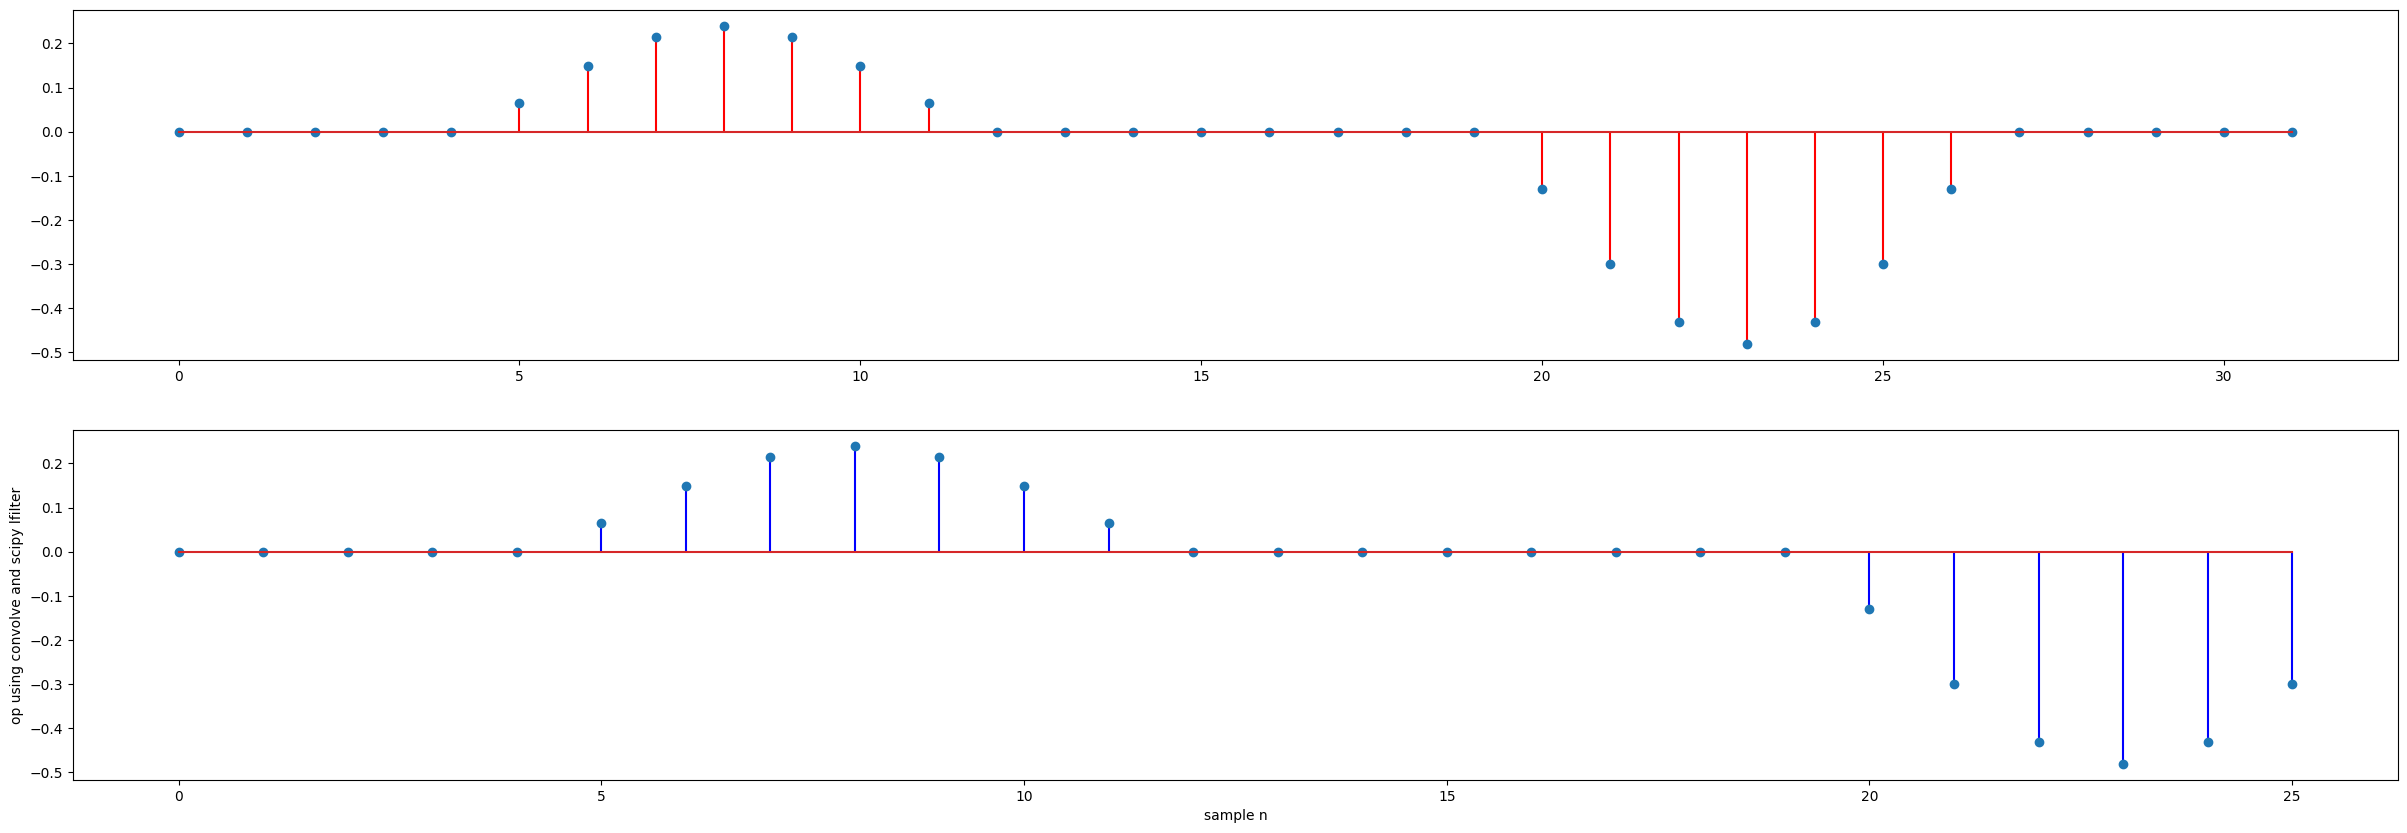

In [26]:
x_n = [0 for _ in range(5)] +  [1] + [0 for _ in range(14)] + [-2] + [0 for _ in range(5)]
print(x_n)
print(len(x_n))
myFilter_Convolve(h1_n,x_n)

output is the result of the convolution of the input signal with the impulse response

#### c. Generate an input sequence (1sec duration) consisting of two sinusoid of frequencies 0.7KHz and 3.333 KHz sinusoid signal with amplitude 0.1 sampled at 16 KHz. This input sequence is passed through the two given LTI system.
i. Plot this signal’s spectrogram (scale Sxx by 10*log10(Sxx)) using scipy’s spectrogram function [3]. See Lab2Example.py

ii. For each system, generate the corresponding output.

iii. Examine each system’s output signal by plotting it in time domain, its spectrogram, by listening to it, and suggest what had happened to the input signal after it has passed through each system?

In [27]:
def fnGenSampledSinusoid(A,Freq,Phi, Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return [n,y]

In [28]:
def pltSpectrogram(sampleX_float,fs):
    freqs, times, spectrogram = signal.spectrogram(sampleX_float, fs)
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()

In [29]:
def q1c(fs = 16000):
    print("0.7KHz")
    [n,sin1] = fnGenSampledSinusoid(0.1,0.7*1000,0,fs,0,1)
    pltSpectrogram(sin1,fs )
    # Plot the spectrogram
    y1a = np.convolve(h1_n,sin1)
    pltSpectrogram(y1a, fs)
    y2a = np.convolve(h2_n,sin1)
    pltSpectrogram(y2a, fs)

    print("3.333 KHz")
    [n,sin2] = fnGenSampledSinusoid(0.1,3.3*1000,0,16000,0,1)
    pltSpectrogram(sin2, 16000)
    # Plot the spectrogram
    y1b = np.convolve(h1_n,sin2)
    pltSpectrogram(y1b, fs)
    y2b = np.convolve(h2_n,sin2)
    pltSpectrogram(y2b, fs)

0.7KHz


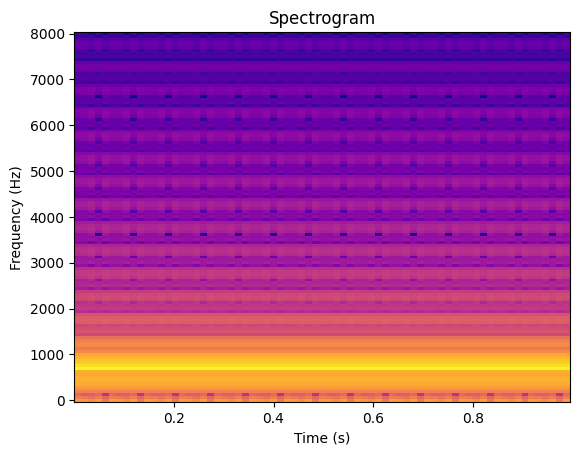

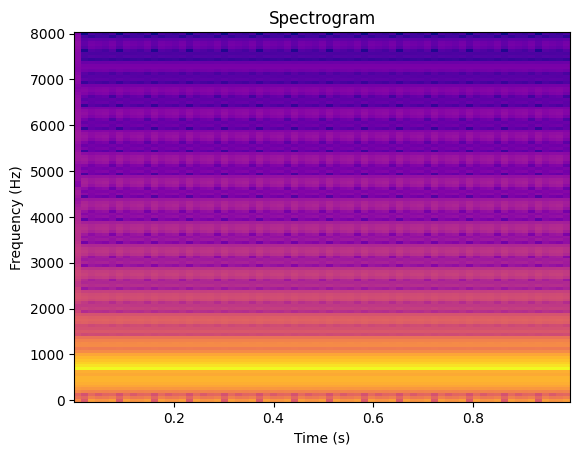

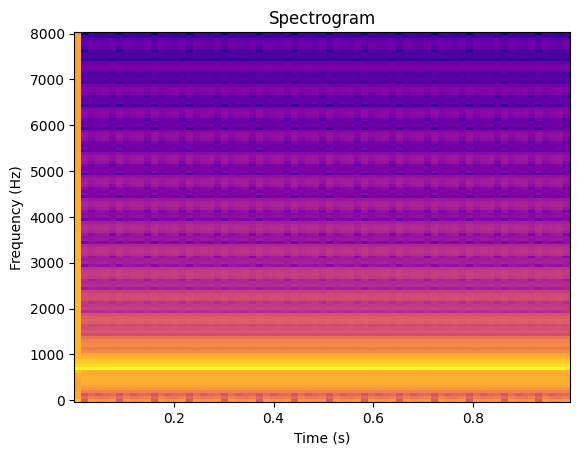

3.333 KHz


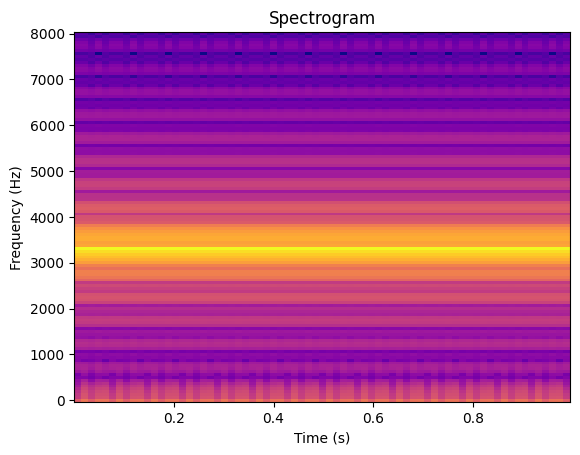

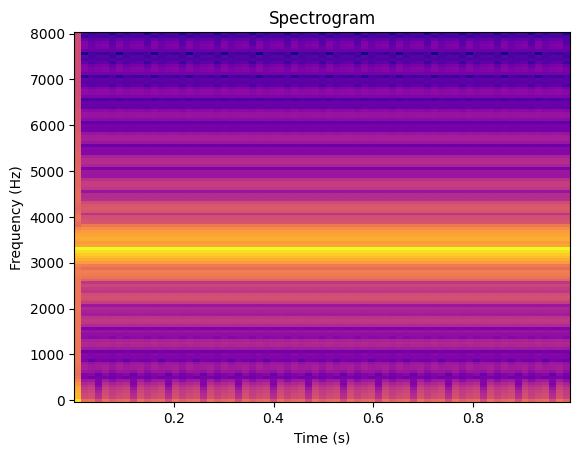

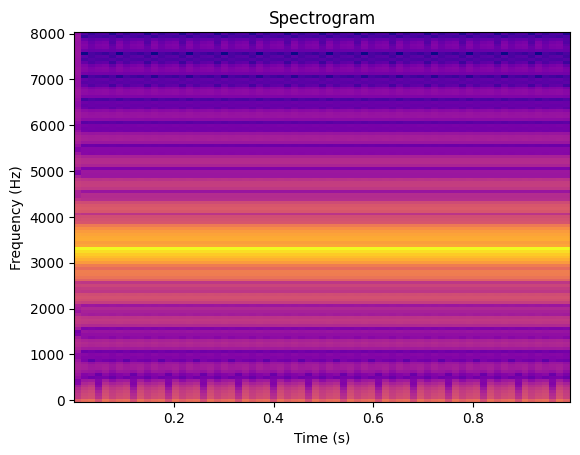

In [30]:
q1c()

In conclusion, the input signal has been filtered and delayed by each of the LTI systems, with the specific frequency response of each system affecting the resulting output.

### 5. Load a wave file “helloworld_noisy_16bit.wav”. Listen to it. 

It is a speech utterance corrupted with a sinusoid at 3KHz. Send this wave file sequence through a system described by a constant coefficient difference equation [5,9] with the following coefficients: B= [1 -0.7653668, 0.99999], A = [1, -0.722744, 0.888622] 

a. Plot the input signal in time domain as well as its spectrogram (scale Sxx by 10*log10(Sxx)) using scipy’s spectrogram function [3]. See Lab2Example.py.

In [73]:
def Q5a():
    [fs, data] = extract_data_from_wav("helloWorld_noisy_16bit.wav") 
    winsound.PlaySound("helloWorld_noisy_16bit.wav", winsound.SND_FILENAME)
    print(len(data))
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(data,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    freqs, times, spectrogram = signal.spectrogram(data, fs)
    plt.subplot(122)
    # Plot the spectrogram
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()
    

14933


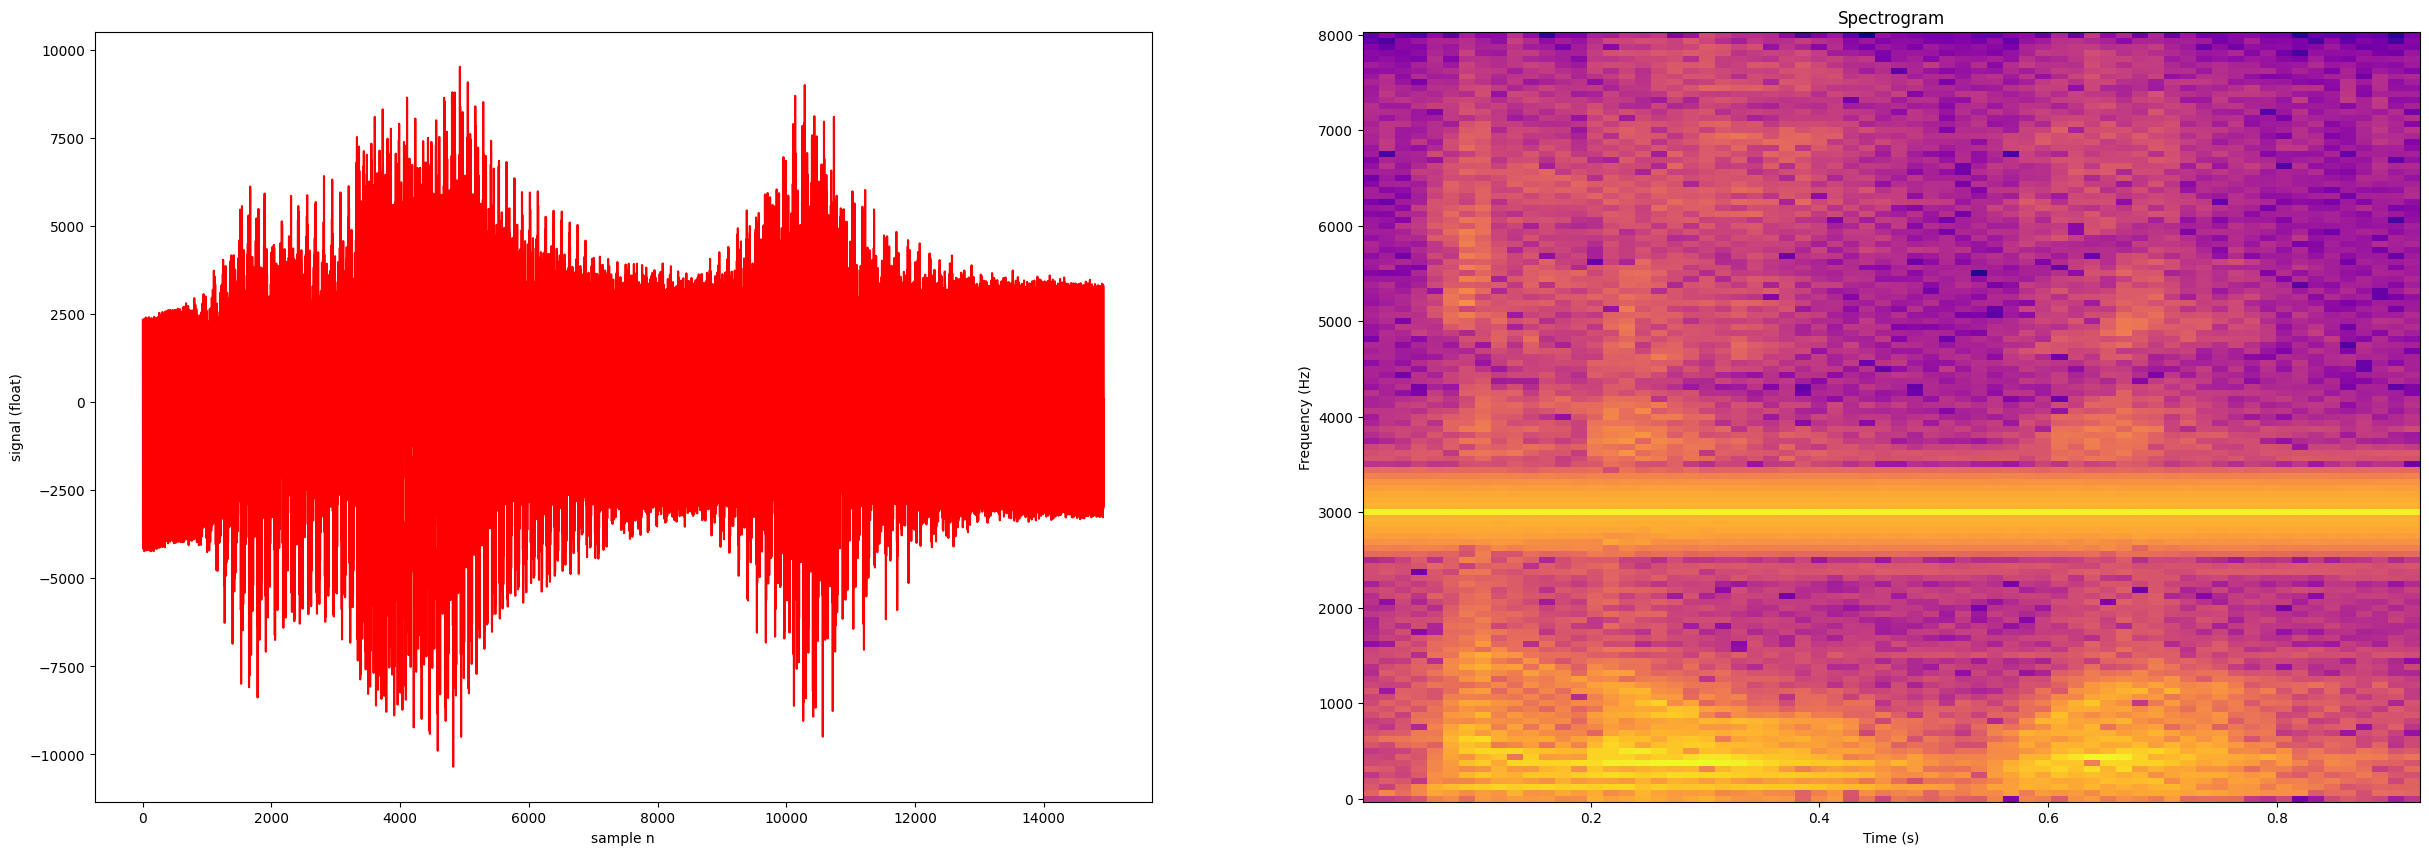

In [74]:
Q5a()

b. Sketch the direct form 1 representation [9] and write the difference equation of the system.

y[n] = b[0]x[n] + b[1]x[n-1] + b[2]x[n-2] - a[1]y[n-1] - a[2]y[n-2] 

y[n] = 1x[n] - 0.7653668x[n-1] + 0.99999x[n-2] + 0.722744y[n-1] - 0.888622y[n-2]

c. Implement your own code to generate the output for the above system, you can compare your results using SciPy’s lfilter module[6]. See Lab2ExampleFilter.py

In [104]:
def lti_system(input_signal, B, A):
    N = len(input_signal)
    M = len(A) - 1
    y = np.zeros(N)
    for n in range(N):
        y[n] = B[0] * input_signal[n]
        for i in range(1, M+1):
            if n >= i:
                y[n] -= A[i] * y[n-i]
        for i in range(1, min(n+1, len(B))):
            y[n] += B[i] * input_signal[n-i]
    return y

In [115]:
def Q5c():
    [fs, data] = extract_data_from_wav("helloWorld_noisy_16bit.wav") 
    b = [1, -0.7653668, 0.99999]
    a = [1, -0.722744, 0.888622]
    y_1 = signal.lfilter(b, a, data)
    y_2 = lti_system(data, b, a)
    
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(y_1,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    plt.subplot(122)
    # Plot the spectrogram
    plt.plot(y_2,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    plt.show()
    print(np.allclose(y_1, y_2))

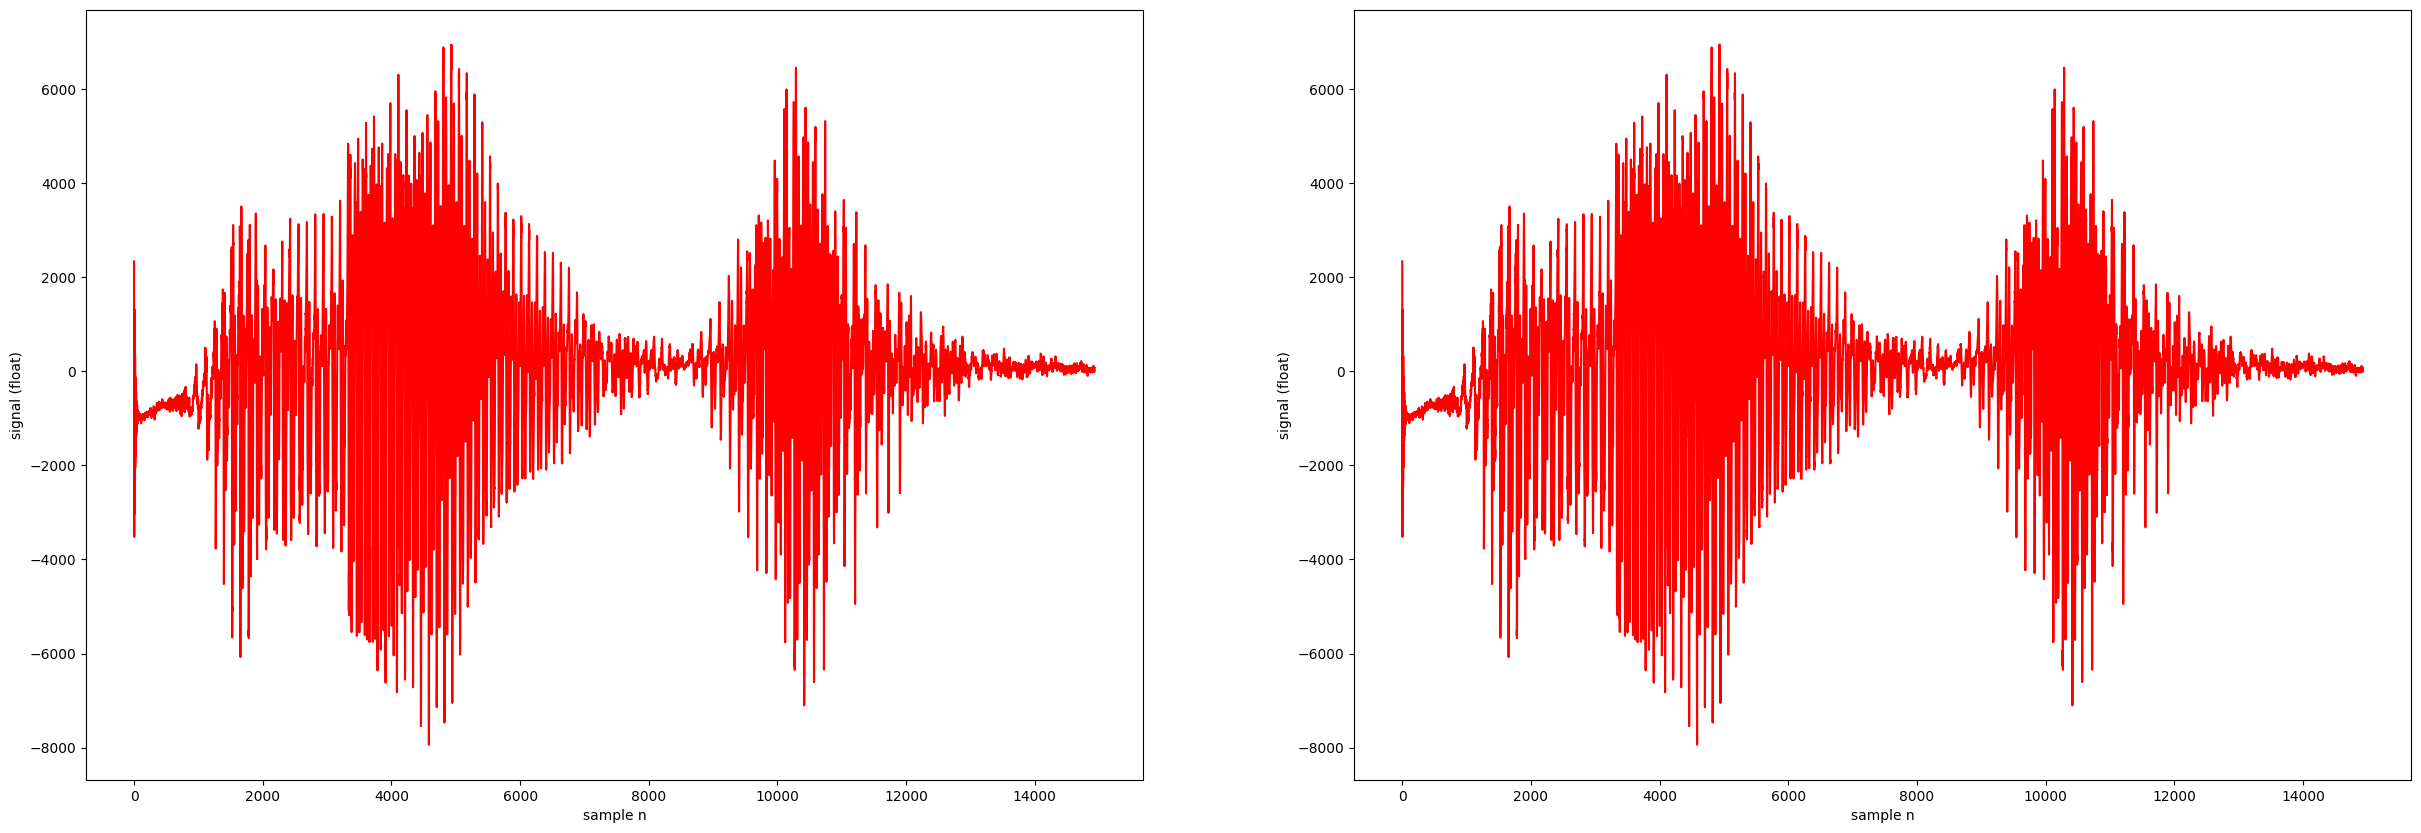

True


In [116]:
Q5c()

d. Generate the output for the given input. Listen to the output signal, plot the input and output signal in time domain. Compare the spectrogram of the output signal to the input signal. Hence comment what effects the system has on the input. Hint: read about notch filter [4]

In [128]:
def Q5d():
    [fs, data] = extract_data_from_wav("helloWorld_noisy_16bit.wav") 
    winsound.PlaySound("helloWorld_noisy_16bit.wav", winsound.SND_FILENAME)
    b = [1, -0.7653668, 0.99999]
    a = [1, -0.722744, 0.888622]
    y_1 = signal.lfilter(b, a, data)
    #y_2 = lti_system(data, b, a)
    
    #y_16bit = fnNormalizeFloatTo16Bit(y_1)
    #wavfile.write("helloWorld_noisy_16bit_filtered.wav", fs, y_16bit)
    #winsound.PlaySound("helloWorld_noisy_16bit_filtered.wav", winsound.SND_FILENAME)
    
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(data,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    freqs, times, spectrogram = signal.spectrogram(data, fs)
    plt.subplot(122)
    # Plot the spectrogram
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()
    
    plt.figure(figsize=(30,10))
    plt.subplot(121)
    plt.plot(y_1,'r')
    plt.ylabel('signal (float)')
    plt.xlabel('sample n')
    
    freqs, times, spectrogram = signal.spectrogram(y_1, fs)
    plt.subplot(122)
    # Plot the spectrogram
    plt.pcolormesh(times, freqs, 10*np.log10(spectrogram),cmap='plasma')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.show()

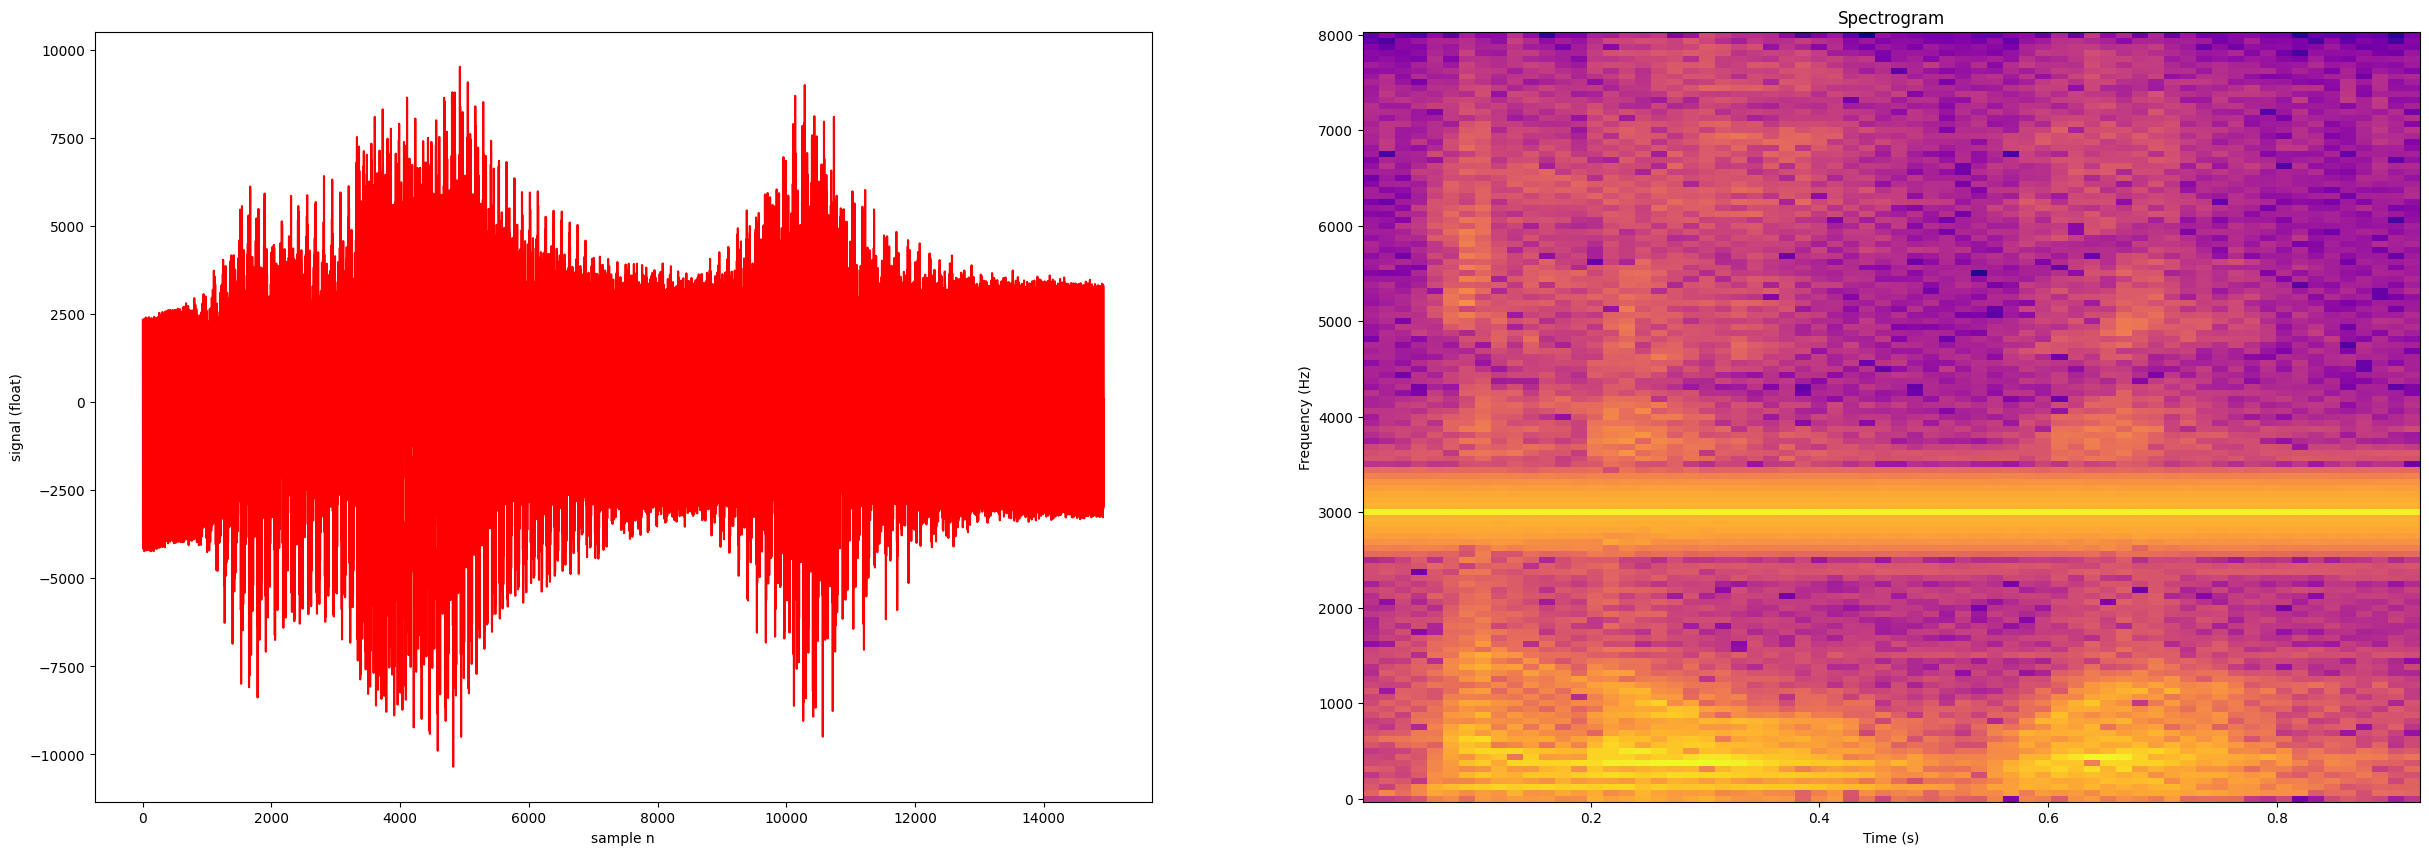

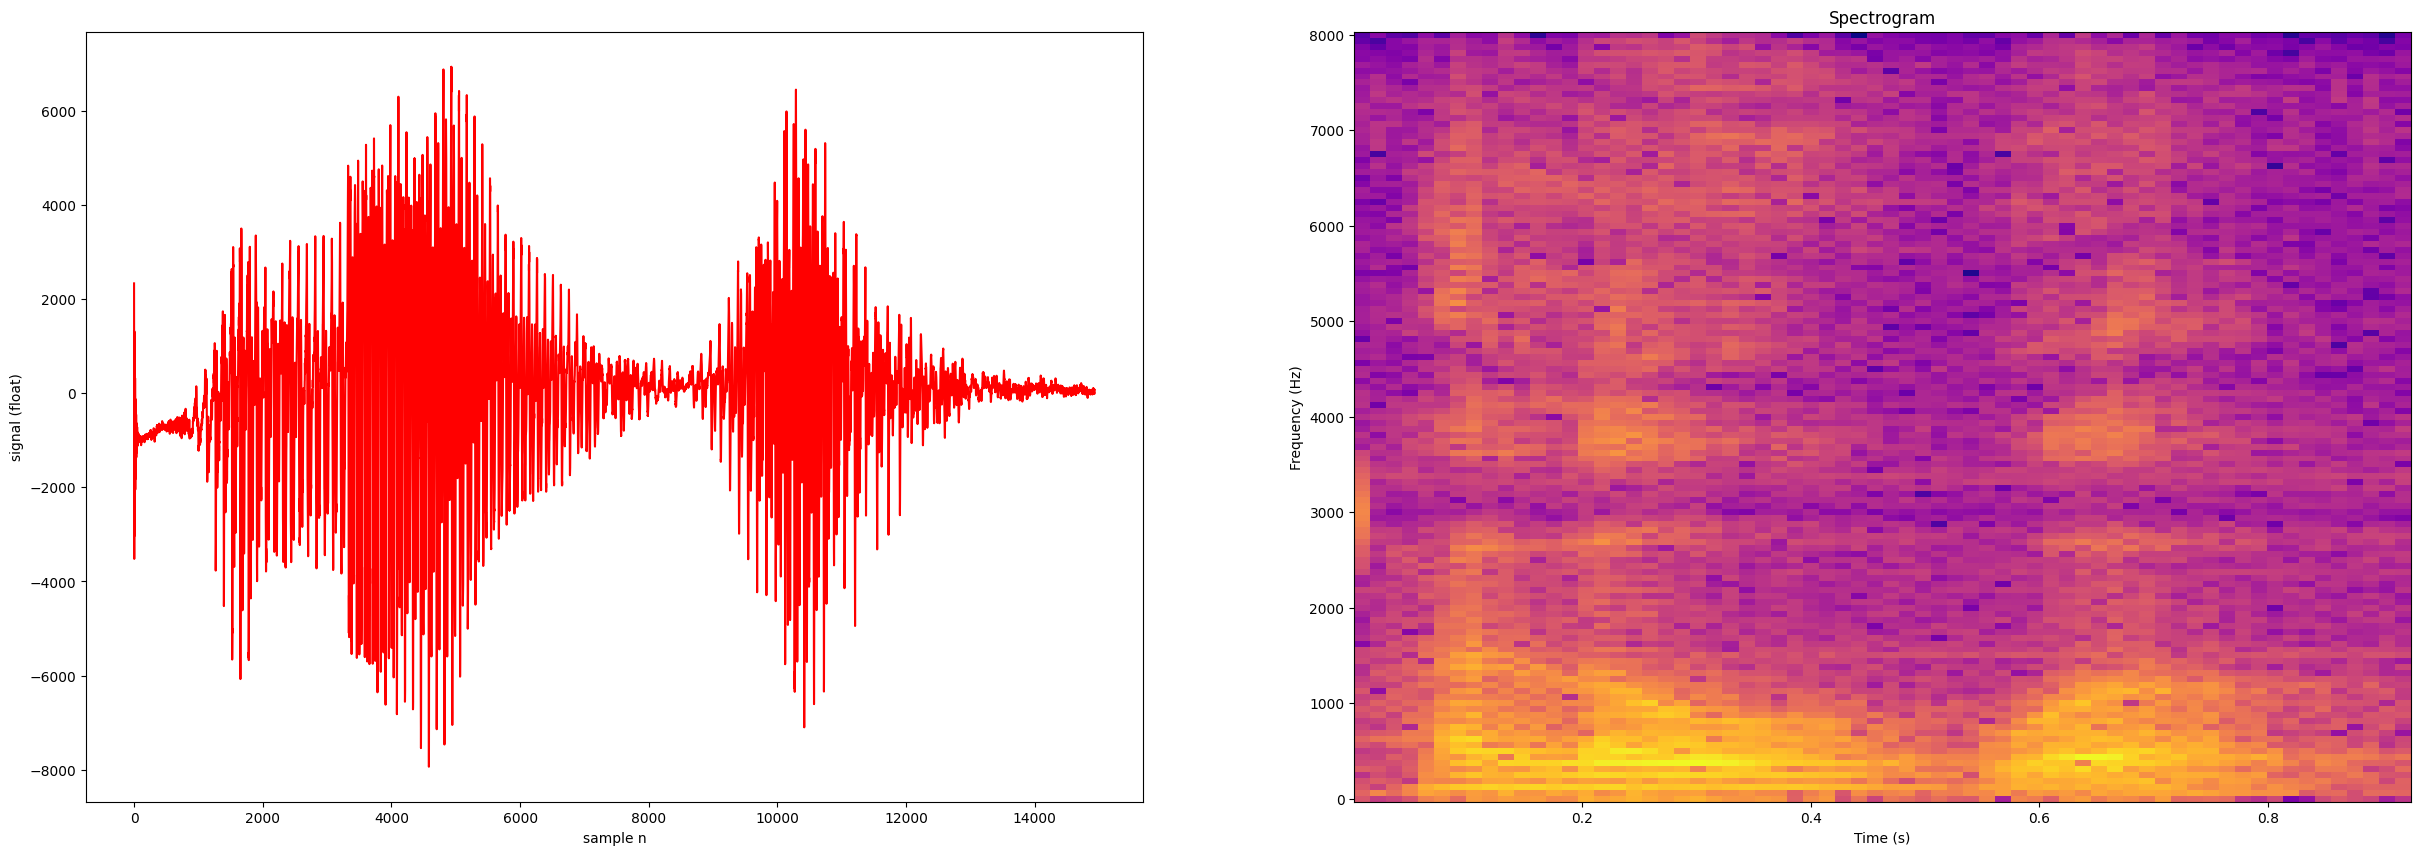

In [129]:
Q5d()

e. Suggest how to determine if the system is stable, and hence determine the above system’s stability?

### ANS
To determine if an LTI system is stable, we can examine the poles of its transfer function. If all the poles of the transfer function are located inside the unit circle, then the system is considered stable.

Stable as all the poles are within the unit circle

f. Find the close form equation representing the impulse response. Generate 10 values
of the impulse response and compare it against Matlab’s fvtool(B,A) realisation.

In [54]:
b = [1, -0.7653668, 0.99999]
a = [1, -0.722744, 0.888622]
matplotlib.fvtool(b,a)

NameError: name 'matplotlib' is not defined